## Can you accurately predict **insurance costs** ?

In [1]:
# import important libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.simplefilter('ignore')

In [2]:
insurance_data = pd.read_csv('insurance.csv')
insurance_data.sample(5)

,age,sex,bmi,children,smoker,region,charges
843,57,female,29.810,0,yes,southeast,27533.91290
1194,31,female,21.755,0,no,northwest,4134.08245
799,33,male,24.795,0,yes,northeast,17904.52705
786,60,male,36.955,0,no,northeast,12741.16745
755,31,male,27.645,2,no,northeast,5031.26955


In [3]:
insurance_data.shape

(1338, 7)

In [5]:
# show if data have null values or not
insurance_data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# see duplicate values
insurance_data.duplicated().sum()

1

In [7]:
insurance_data[insurance_data.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [8]:
data = insurance_data.drop_duplicates()
data.shape

(1337, 7)

In [9]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [10]:
# Encode Categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['sex'] = le.fit_transform(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])
data['region'] = le.fit_transform(data['region'])

data.sample(4)

,age,sex,bmi,children,smoker,region,charges
786,60,1,36.955,0,0,0,12741.16745
141,26,1,32.490,1,0,0,3490.54910
372,42,0,33.155,1,0,0,7639.41745
773,19,0,28.880,0,1,1,17748.50620


In [11]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.204936,1.516081,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,1.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


### EDA

<Axes: >

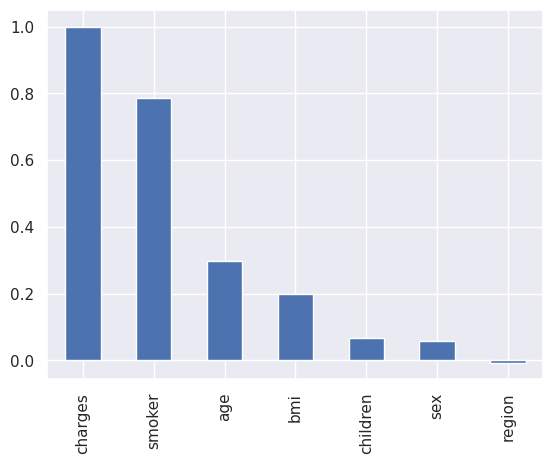

In [12]:
data.corr()['charges'].sort_values(ascending = False).plot(kind = 'bar')

<Axes: >

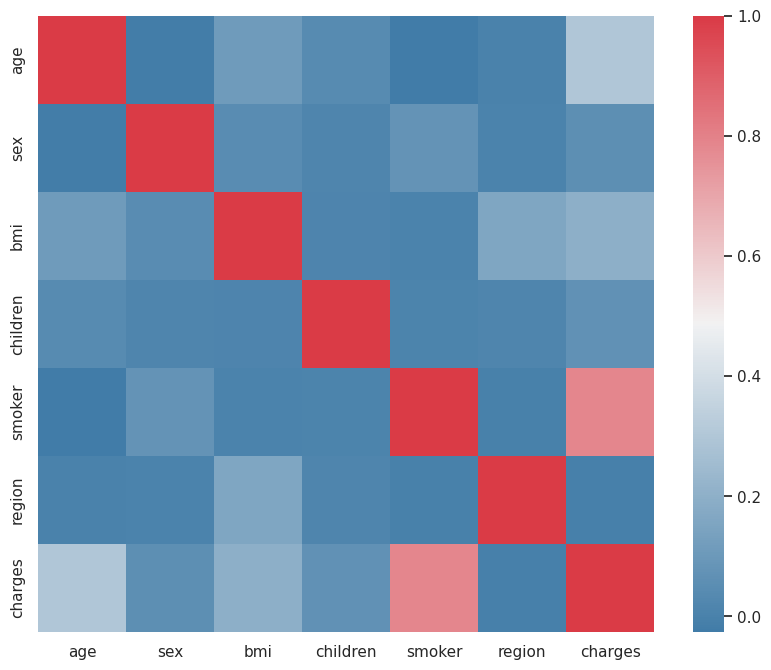

In [13]:
f, ax = plt.subplots(figsize = (10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype = np.bool_), cmap = sns.diverging_palette(240,10, as_cmap = True),
            square = True, ax = ax)

* A strong correlation is observed only with the fact of smoking the patient

In [14]:
# distribution of charges
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
import scipy.special
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file

p = figure(title = "Distribution of charges",tools = "save",
            background_fill_color = "#E8DDCB")
hist, edges = np.histogram(data.charges)
p.quad(top = hist, bottom = 0, left = edges[:-1], right = edges[1:],
        fill_color = "#036564", line_color = "#033649")

p.xaxis.axis_label = 'x'
p.yaxis.axis_label = 'Pr(x)'
show(gridplot([[p]],plot_width=400, plot_height=400, toolbar_location=None))


Loading BokehJS ...

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

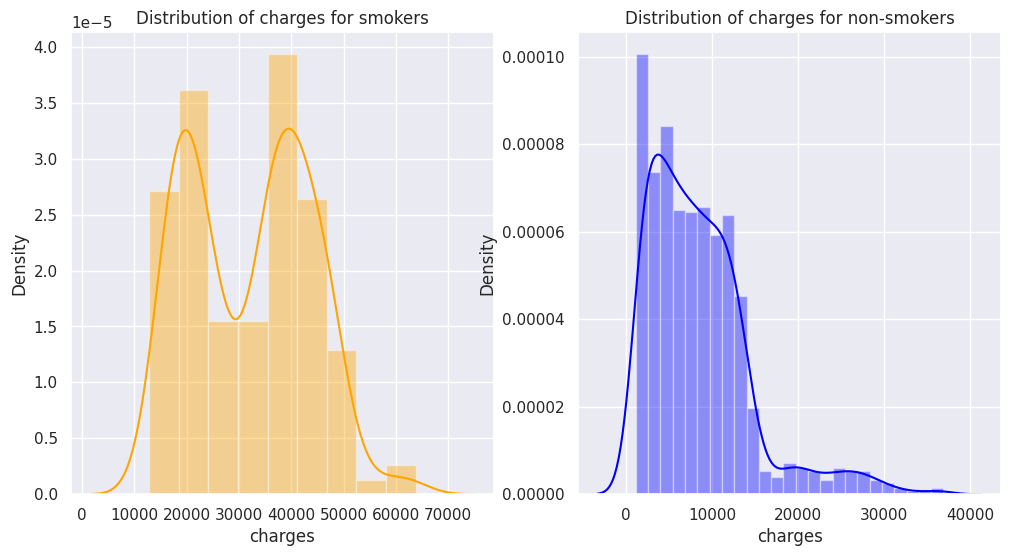

In [15]:
# Distribution of charges for smokers and non-smokers
f = plt.figure(figsize = (12, 6))
ax = f.add_subplot(121)
sns.distplot(data[data.smoker == 1]['charges'], color = 'orange', ax = ax)
ax.set_title('Distribution of charges for smokers')

ax = f.add_subplot(122)
sns.distplot(data[data.smoker == 0]['charges'], color = 'blue', ax = ax)
ax.set_title('Distribution of charges for non-smokers')

* Smoking patients spend more on treatment

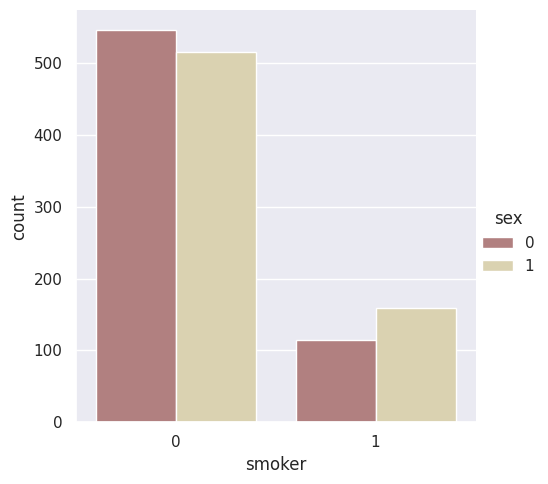

In [16]:
sns.catplot(x = "smoker", kind = "count",hue = 'sex', palette = "pink", data = data)

* we can notice that more male smokers than women smokers. It can be assumed that the total cost of treatment in men will be more than in women

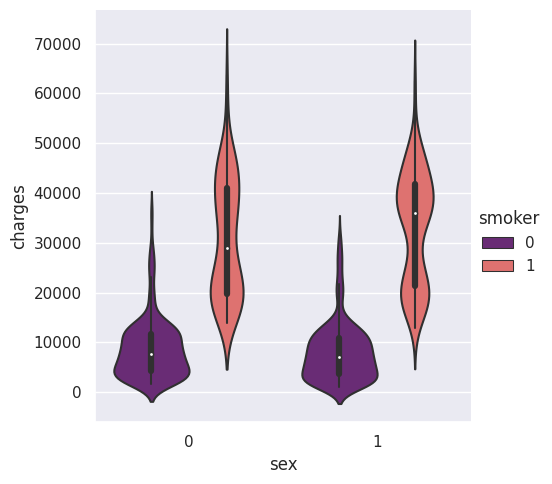

In [17]:
sns.catplot(x = "sex", y = "charges", hue = "smoker",
            kind = "violin", data = data, palette = 'magma')

<Axes: title={'center': 'Box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

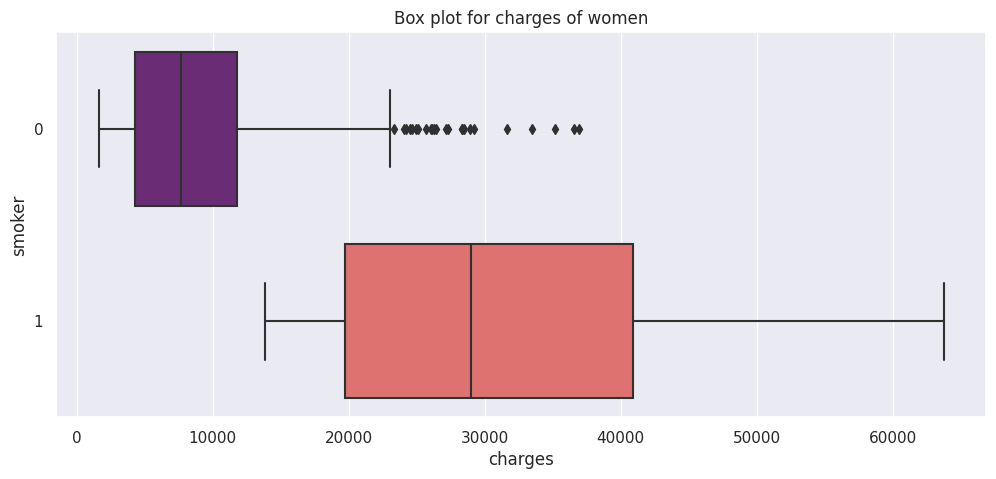

In [18]:
plt.figure(figsize = (12, 5))
plt.title("Box plot for charges of women")
sns.boxplot(y = "smoker", x = "charges", data =  data[(data.sex == 0)] , orient = "h", palette = 'magma')

<Axes: title={'center': 'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

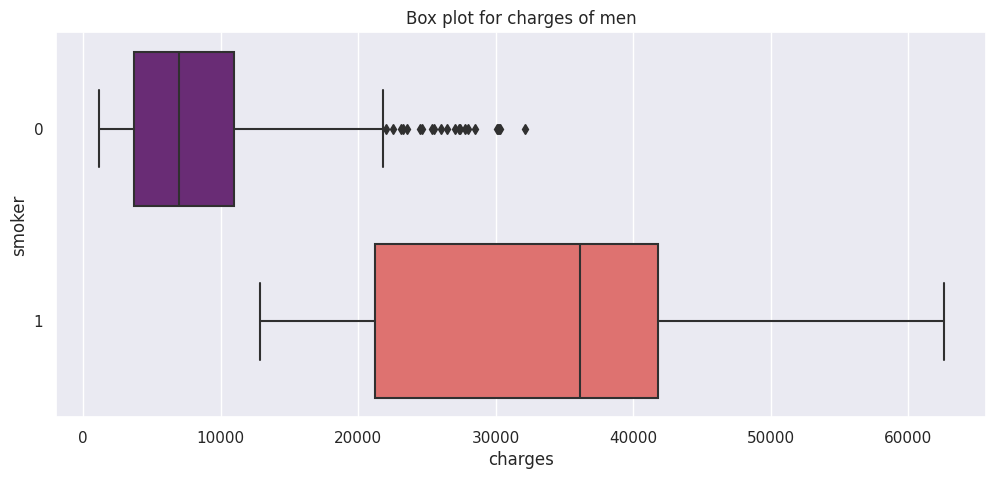

In [19]:
plt.figure(figsize = (12, 5))
plt.title("Box plot for charges of men")
sns.boxplot(y = "smoker", x = "charges", data =  data[(data.sex == 1)] , orient = "h", palette = 'magma')

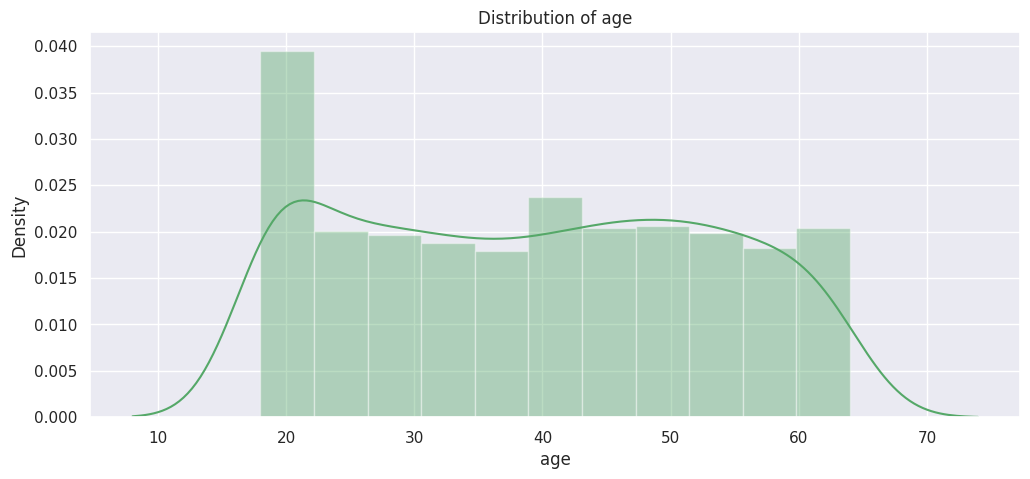

In [20]:
#  let's look at how age affects the cost of treatment
plt.figure(figsize = (12,5))
plt.title("Distribution of age")
ax = sns.distplot(data["age"], color = 'g')

* We have patients under 20 in our data set. Im 18 years old. This is the minimum age of patients in our set. The maximum age is 64 years

Text(0.5, 1.0, 'The number of smokers and non-smokers (18 years old)')

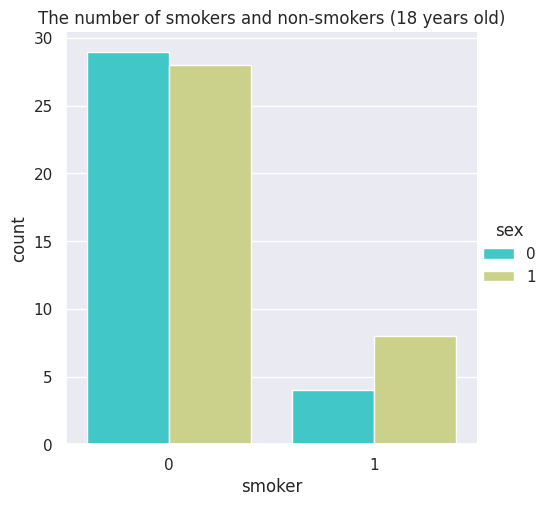

In [21]:
# see whether there are smokers among patients 18 years.
sns.catplot(x = "smoker", kind = "count",hue = 'sex', palette = "rainbow", data = data[(data.age == 18)])
plt.title("The number of smokers and non-smokers (18 years old)")

<Axes: title={'center': 'Box plot for charges 18 years old smokers'}, xlabel='charges', ylabel='smoker'>

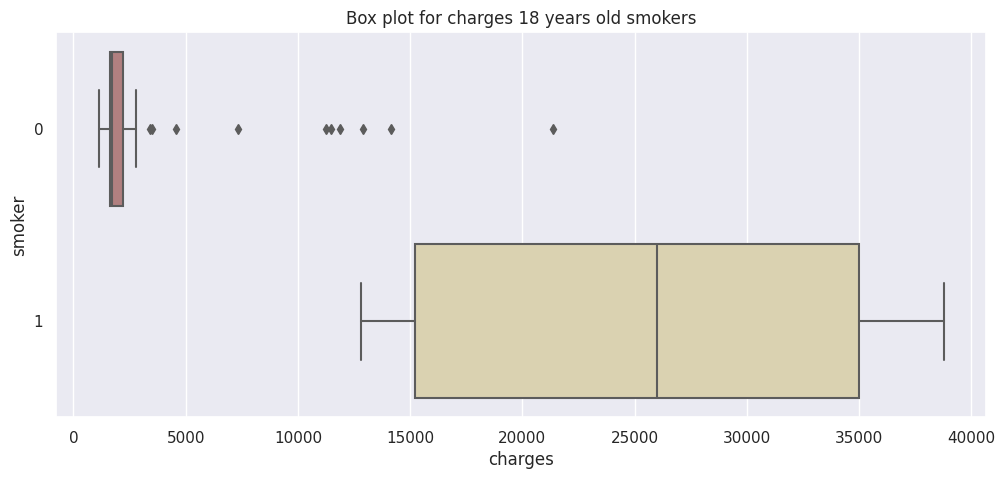

In [22]:
plt.figure(figsize = (12,5))
plt.title("Box plot for charges 18 years old smokers")
sns.boxplot(y = "smoker", x = "charges", data = data[(data.age == 18)] , orient = "h", palette = 'pink')

In [23]:
#Now let's see how the cost of treatment depends on the age of smokers and non-smokers patients
# non smokers
p = figure(plot_width=500, plot_height=450)
p.circle(x = data[(data.smoker == 0)].age, y = data[(data.smoker == 0)].charges, size = 7, line_color = "navy",
          fill_color = "pink", fill_alpha = 0.9)

show(p)

In [24]:
#smokers
p = figure(plot_width = 500, plot_height = 450)
p.circle(x = data[(data.smoker == 1)].age, y = data[(data.smoker == 1)].charges, size = 7, line_color = "navy", fill_color = "red",
          fill_alpha = 0.9)
show(p)

Text(0.5, 1.0, 'Smokers and non-smokers')

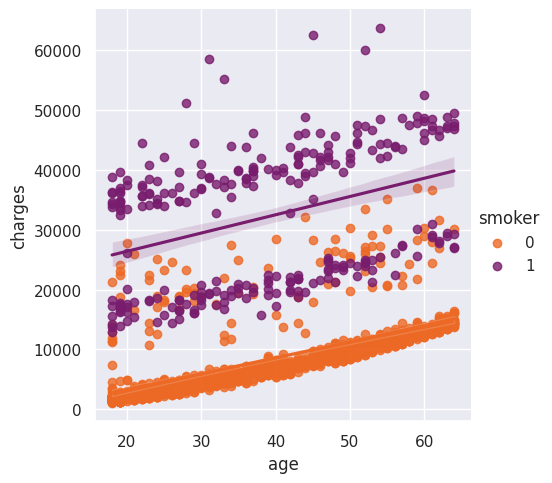

In [25]:
sns.lmplot(x = "age", y = "charges", hue = "smoker", data = data, palette = 'inferno_r')
ax.set_title('Smokers and non-smokers')

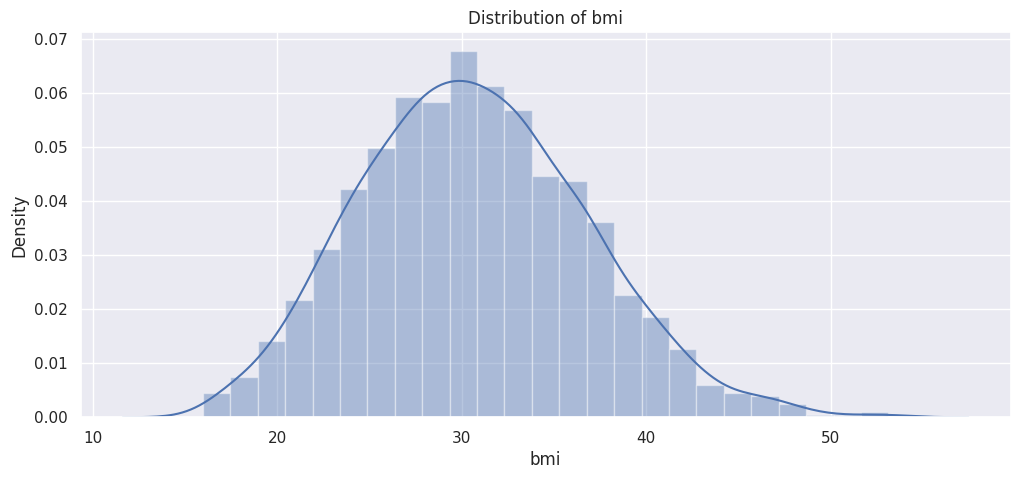

In [26]:
plt.figure(figsize = (12, 5))
plt.title("Distribution of bmi")
ax = sns.distplot(data["bmi"], color = 'b')

* The average BMI in patients is 30,  let's look at the distribution of costs in patients with BMI greater than 30 and less than 30.

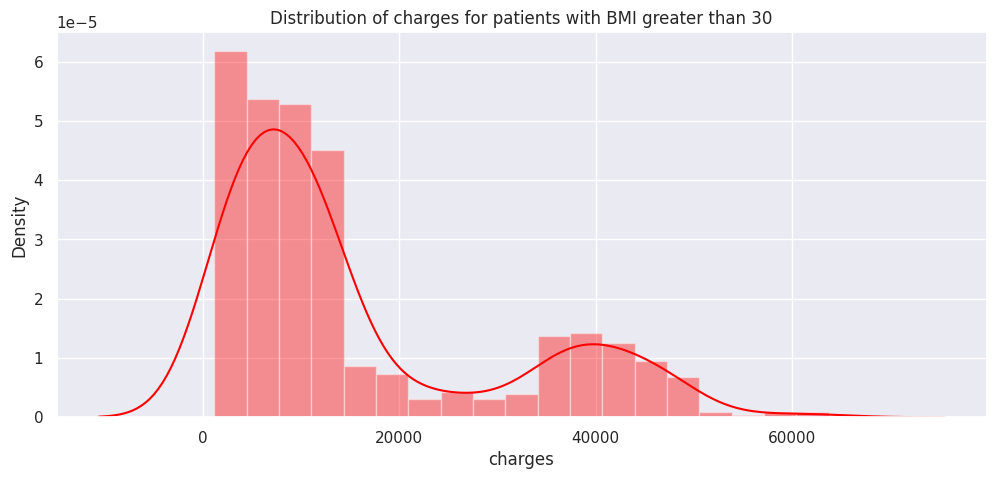

In [27]:
plt.figure(figsize = (12, 5))
plt.title('Distribution of charges for patients with BMI greater than 30')
ax = sns.distplot(data[data.bmi >= 30]['charges'], color = 'red')

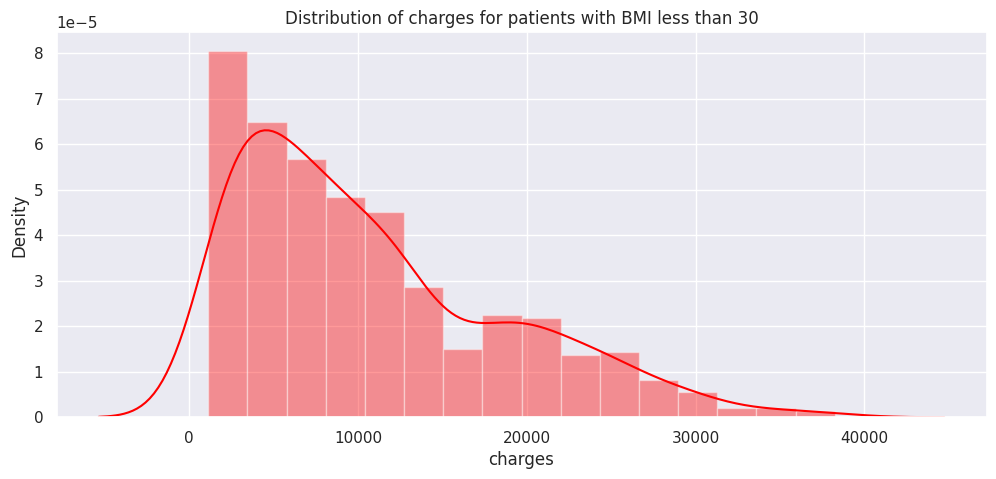

In [28]:
plt.figure(figsize = (12, 5))
plt.title('Distribution of charges for patients with BMI less than 30')
ax = sns.distplot(data[data.bmi < 30]['charges'], color = 'red')

 * Patients with BMI above 30 spend more on treatment!

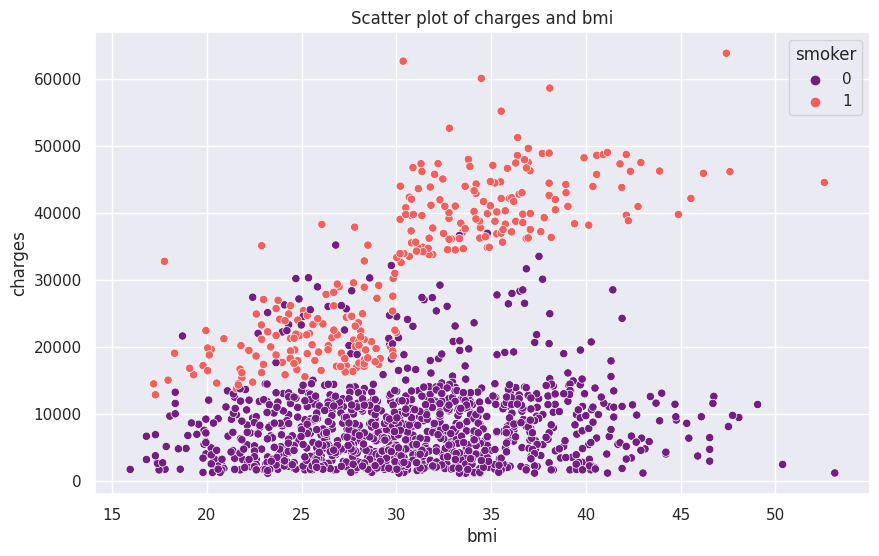

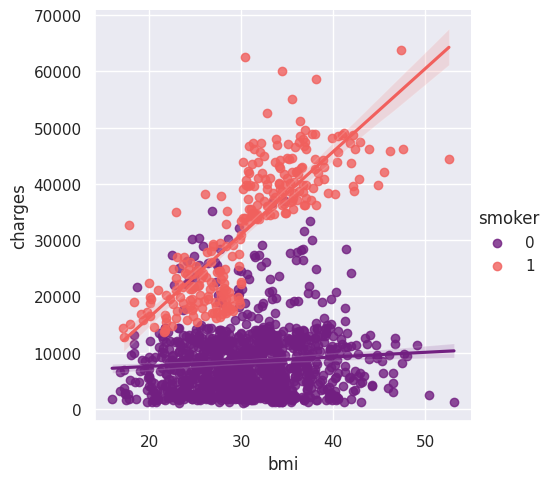

In [29]:
plt.figure(figsize = (10, 6))
ax = sns.scatterplot(x = 'bmi', y = 'charges',data = data, palette = 'magma',hue = 'smoker')
ax.set_title('Scatter plot of charges and bmi')

sns.lmplot(x = "bmi", y = "charges", hue = "smoker", data = data, palette = 'magma')

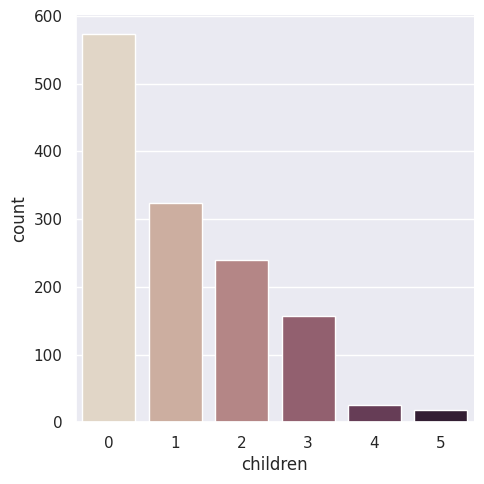

In [30]:
#  let's see how many children our patients have
sns.catplot(x = 'children', kind = 'count', palette = 'ch:.25', data = data)

* Most patients do not have children. Perfectly that some have 5 children!
* i wonder if people who have children smoke !

Text(0.5, 1.0, 'Smokers and non-smokers who have childrens')

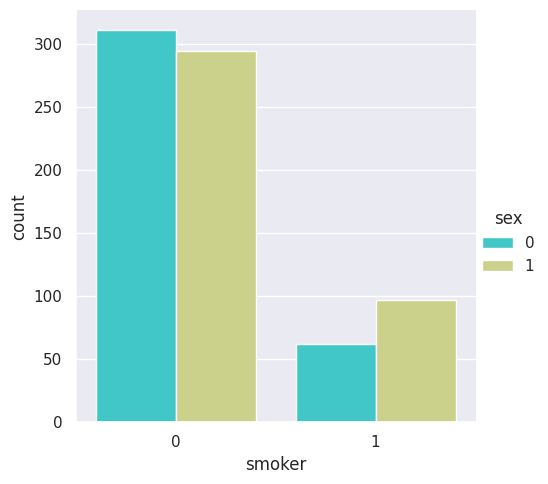

In [31]:
sns.catplot(x = "smoker", kind = "count", palette = "rainbow",hue = "sex",
            data = data[(data.children > 0)])
ax.set_title('Smokers and non-smokers who have childrens')

### Dealing with outliers

In [32]:
string_cols = insurance_data.select_dtypes('object').columns.to_list()
num_cols = insurance_data.copy().columns.to_list()
for i in string_cols:
    num_cols.remove(i)
num_cols

['age', 'bmi', 'children', 'charges']

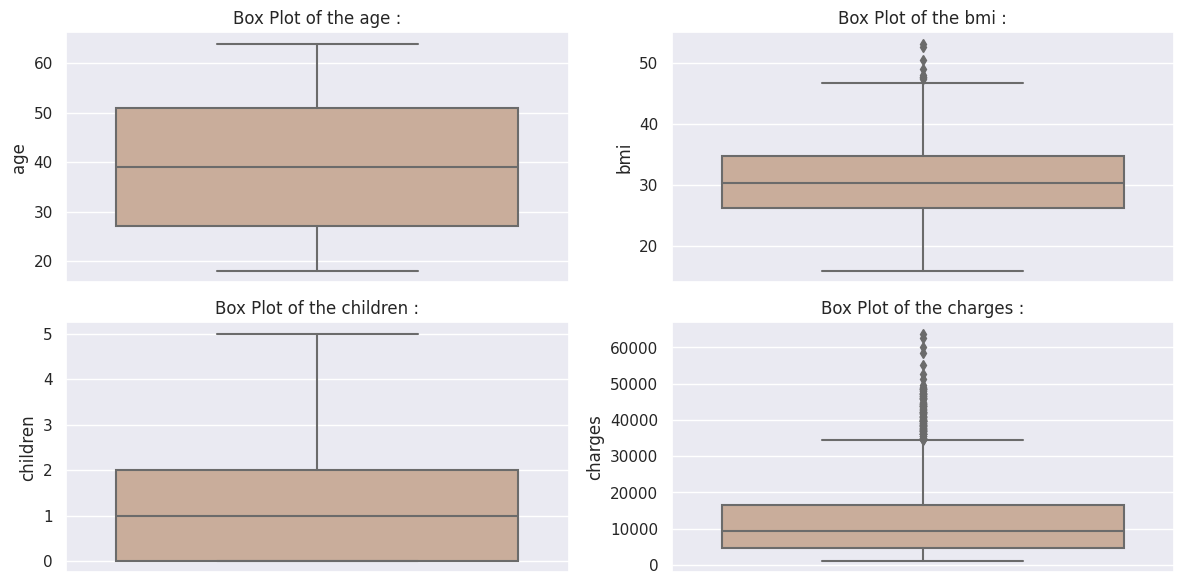

In [33]:
plt.figure(figsize=(12,6))
for i, col in enumerate(data[num_cols].columns, 1):
    plt.subplot(2, 2, i)
    plt.title(f'Box Plot of the {col} :')
    sns.boxplot(y = data[col] , orient = "h", palette = 'pink')
    plt.tight_layout()
    plt.plot()

In [34]:
# define a function to find out the IQR, lower and the upper whisker
def out_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [35]:
out_iqr(data, 'charges')

The IQR is 11911.37345
The lower bound value is -13120.716174999998
The upper bound value is 34524.777625
Total number of outliers are 139


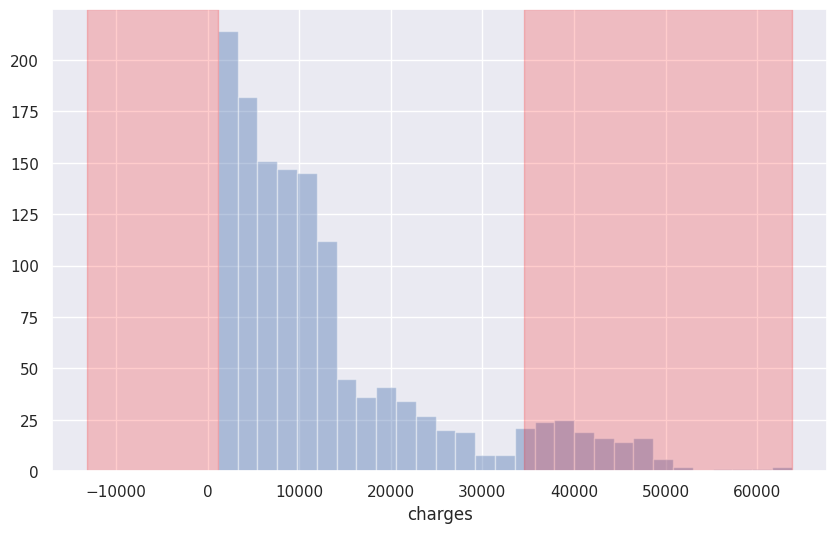

In [36]:
plt.figure(figsize = (10,6))
sns.distplot(data.charges, kde = False)
plt.axvspan(xmin = lower, xmax = data.charges.min(), alpha = 0.2, color = 'red')
plt.axvspan(xmin = upper, xmax = data.charges.max(), alpha = 0.2, color = 'red')

In [37]:
data_new = data[(data['charges'] < upper) & (data['charges'] > lower)]
data_new.shape

(1198, 7)

In [38]:
out_iqr(data_new, 'bmi')

The IQR is 8.02
The lower bound value is 13.770000000000001
The upper bound value is 45.85
Total number of outliers are 13


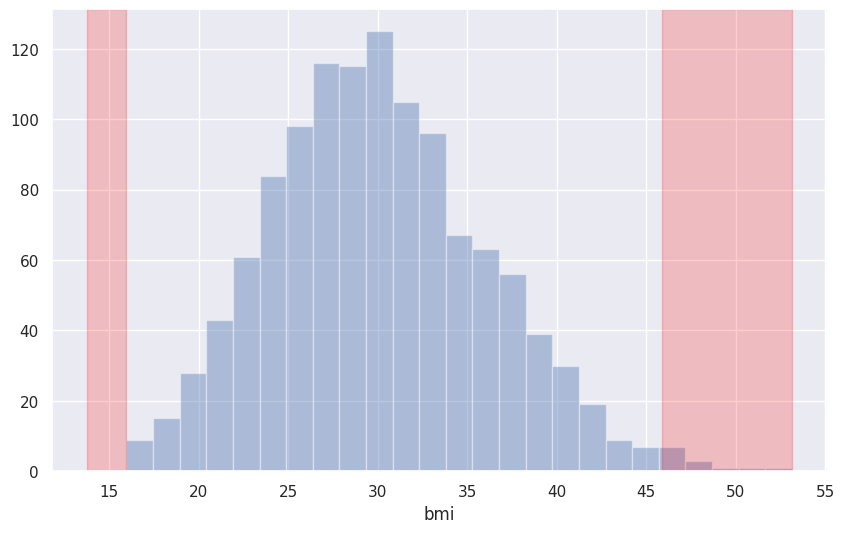

In [39]:
plt.figure(figsize = (10,6))
sns.distplot(data_new.bmi, kde = False)
plt.axvspan(xmin = lower, xmax = data_new.bmi.min(), alpha = 0.2, color = 'red')
plt.axvspan(xmin = upper, xmax = data_new.bmi.max(), alpha = 0.2, color = 'red')

In [40]:
data_without_outliers = data_new[(data_new['bmi'] < upper) & (data_new['bmi'] > lower)]
data_without_outliers.shape

(1185, 7)

### Modeling

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

#### Linear Regression

In [41]:
x = data.drop(['charges'], axis = 1)
y = data.charges

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

lr = LinearRegression()
lr.fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

lr.score(x_test,y_test)

0.7438474494767134

In [42]:
# add polynomial signs
X = data.drop(['charges'], axis = 1)
Y = data.charges



quad = PolynomialFeatures (degree = 3)
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad, Y, random_state = 0)

plr = LinearRegression().fit(X_train, Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test,Y_test))

0.841542516765322


#### K-Nearest Neighbors

In [43]:
x = data.drop(['charges'], axis = 1)
y = data.charges

X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state = 0)

In [47]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

params = {
    'n_neighbors': range(1, 100, 2),
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan']
    }
knn = KNeighborsRegressor()
rs = GridSearchCV(estimator = knn, param_grid = params, cv = 10,
                   n_jobs = -1, scoring = 'neg_mean_squared_error')

rs.fit(X_train, Y_train)
print(rs.best_estimator_)
knn = rs.best_estimator_

knn.fit(X_train, Y_train)
pred = knn.predict(X_test)

print('-'*30)
r2 = r2_score(Y_test, pred)
print('R2: ', r2)

err = np.sqrt(mean_squared_error(Y_test, pred))
print('Root Mean Squared Error: ', err)

knn_reg = ('KNN', r2, err)

KNeighborsRegressor(metric='manhattan', n_neighbors=13, weights='distance')
------------------------------
R2:  0.3505265736433322
Root Mean Squared Error:  10179.003471127451


#### Suport Vector Machine

In [49]:
from sklearn.svm import SVR

params = {
    'C': [0.1, 1, 10, 50, 100],
    'gamma': [0.01, 0.1, 1, 10],
    'kernel': ['linear']
}
svr = SVR()
rs = GridSearchCV(estimator = svr, param_grid = params, cv = 10,
                   n_jobs = -1, scoring = 'neg_mean_squared_error')

rs.fit(X_train, Y_train)
print(rs.best_estimator_)
svr = rs.best_estimator_

svr.fit(X_train, Y_train)
pred = svr.predict(X_test)

print('-'*30)
r2 = r2_score(Y_test, pred)
print('R2: ', r2)

err = np.sqrt(mean_squared_error(Y_test, pred))
print('Root Mean Squared Error: ', err)

sv_reg = ('SVR', r2, err)

SVR(C=100, gamma=0.01, kernel='linear')
------------------------------
R2:  0.5061506445076245
Root Mean Squared Error:  8876.092407760505


#### Decision Tree

In [79]:
from sklearn.tree import DecisionTreeRegressor
params = {'max_depth': np.arange(0, 50, 2),
          'max_features': ['auto', 'sqrt'],
          'min_samples_leaf': [3,4,5,6,7,8, 9, 10],
          'min_samples_split': np.linspace(0.1, 1.0, 10),
          'criterion': ['friedman_mse']
         }
tree = DecisionTreeRegressor(random_state=42)
rs = GridSearchCV(estimator = tree, param_grid = params, cv = 10, n_jobs = -1, scoring = 'neg_mean_squared_error')
rs.fit(X_train, Y_train)
print(rs.best_estimator_)

tree = rs.best_estimator_
tree.fit(X_train, Y_train)
pred = tree.predict(X_test)
print('-'*30)

r2 = r2_score(Y_test, pred)
print('R2: ', r2)

err = np.sqrt(mean_squared_error(Y_test, pred))
print('Root Mean Squared Error: ', err)

decision_tree = ('Tree', r2, err)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=4,
                      max_features='sqrt', min_samples_leaf=3,
                      min_samples_split=0.1, random_state=42)
------------------------------
R2:  0.7645147417485079
Root Mean Squared Error:  6129.2372413766125


#### Random Forest

In [113]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators = 1000,
                               max_depth = 5,
                               max_features = 'log2',
                              criterion = 'friedman_mse',
                              min_samples_leaf = 1,
                              min_samples_split=0.001,
                              random_state = 1,
                              n_jobs = -1)
forest.fit(X_train,Y_train)
forest_train_pred = forest.predict(X_train)
forest_test_pred = forest.predict(X_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(Y_train,forest_train_pred),
mean_squared_error(Y_test,forest_test_pred)))

print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(Y_train,forest_train_pred),
r2_score(Y_test,forest_test_pred)))

MSE train data: 20525744.143, MSE test data: 30034371.088
R2 train data: 0.855, R2 test data: 0.812


#### Neural Network

In [70]:
import tensorflow as tf

tf.random.set_seed(123)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(500, activation = 'relu'),
    tf.keras.layers.Dense(500, activation = 'relu'),
    tf.keras.layers.Dense(500, activation = 'relu'),
    tf.keras.layers.Dense(500, activation = 'relu'),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss=tf.keras.losses.mse)
model.fit(X_train, Y_train, epochs = 200)

Epoch 1/200
32/32 [==============================] - 1s 13ms/step - loss: 228154640.0000
Epoch 2/200
32/32 [==============================] - 0s 13ms/step - loss: 135388880.0000
Epoch 3/200
32/32 [==============================] - 0s 13ms/step - loss: 132051712.0000
Epoch 4/200
32/32 [==============================] - 1s 17ms/step - loss: 128216296.0000
Epoch 5/200
32/32 [==============================] - 0s 12ms/step - loss: 125690328.0000
Epoch 6/200
32/32 [==============================] - 0s 12ms/step - loss: 122695624.0000
Epoch 7/200
32/32 [==============================] - 0s 13ms/step - loss: 120996136.0000
Epoch 8/200
32/32 [==============================] - 1s 16ms/step - loss: 118712472.0000
Epoch 9/200
32/32 [==============================] - 0s 14ms/step - loss: 115368392.0000
Epoch 10/200
32/32 [==============================] - 0s 14ms/step - loss: 108182736.0000
Epoch 11/200
32/32 [==============================] - 0s 13ms/step - loss: 95573416.0000
Epoch 12/200
32/32 [

In [71]:
model.evaluate(X_test, Y_test)

11/11 [==============================] - 0s 2ms/step - loss: 26259602.0000


26259602.0

In [73]:
y_pred = model.predict(X_test)
r2_score(Y_test, y_pred)

11/11 [==============================] - 0s 2ms/step


0.8353965116899957